Vinusha T

270

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mother = pd.read_csv('/content/test.csv')
mother.to_csv
mother.head()

Unnamed: 0  Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           0           120               284            27               62   
1           1           113               282            33               64   
2           2           128               279            28               64   
3           3           108               282            23               67   
4           4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False

In [ ]:
s_m = mother[['Maternal Smoker','Birth Weight']]
s_m

Maternal Smoker  Birth Weight
0               False           120
1               False           113
2                True           128
3                True           108
4               False           136
...               ...           ...
1169            False           113
1170            False           128
1171             True           130
1172            False           125
1173            False           117

[1174 rows x 2 columns]

1. Draw the histograms of the two distributions in the sample(2), and state your 
inferences

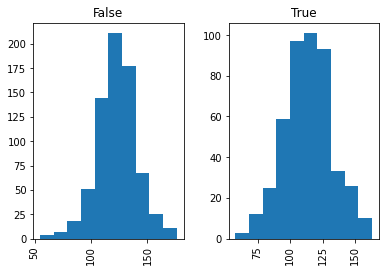

In [ ]:
s_m.hist(column='Birth Weight', by='Maternal Smoker');

In [ ]:
smoke = s_m['Birth Weight'] [s_m['Maternal Smoker'] == True]

In [ ]:
n_smoke = s_m['Birth Weight'] [s_m['Maternal Smoker'] == False]

In [ ]:
import seaborn as sns
smoke.hist(histtype='stepfilled', alpha=.5, bins=20)
n_smoke.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("blue", .75), bins=10)
plt.xlabel('Mother',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

INFERENCE : From the histogram we can infer that the distribution of mothers who smoke is shifetd to left when compared to nuon smoking mothers and overall on average weights of smoker mother babies seems lesser. 

2. Which statistical test would you employ?(2)




AB Test would be the suitable statistical test for this situation because we have 2 different samples and are trying to show that distributions are same

shuffling the birth weights so that means will have no difference

In [ ]:
random = s_m.sample(1174,replace = False)
random

Maternal Smoker  Birth Weight
247             False           102
1038            False           123
259             False           113
557             False           170
202             False           107
...               ...           ...
754             False           124
811             False           124
180             False            90
639             False            91
1162             True           143

[1174 rows x 2 columns]

In [ ]:
r_w = random['Birth Weight']
type(r_w)

pandas.core.series.Series

In [ ]:
r_original = s_m.assign(r_w=r_w.values )
r_original

Maternal Smoker  Birth Weight  r_w
0               False           120  102
1               False           113  123
2                True           128  113
3                True           108  170
4               False           136  107
...               ...           ...  ...
1169            False           113  124
1170            False           128  124
1171             True           130   90
1172            False           125   91
1173            False           117  143

[1174 rows x 3 columns]

If null hypothesis is true all these random arrangements will be equually likely

3. State the Null and Alternative Hypothesis (1)

Null Hypothesis : The average cases in case of both smoking and non smoking mothers is same which means distribution will be same in both the cases

Alternate hypothesis: The average age of mothers who smoke is less than that of the non smokers.

4. What statistic do you recommend to apply for this case(2)?

According to alternate hypothesis, The average age of mothers who smoke is less than that of the non smokers.So we can use the difference between 2 groups as statistic for simulation

5. State the observed statistic(2)

In [ ]:
meandiff = mother.groupby('Maternal Smoker').mean()
type(meandiff)

pandas.core.frame.DataFrame

In [ ]:
meandiff

Unnamed: 0  Birth Weight  Gestational Days  Maternal Age  \
Maternal Smoker                                                             
False            584.900699    123.085315        279.874126     27.544056   
True             588.991285    113.819172        277.897603     26.736383   

                 Maternal Height  Maternal Pregnancy Weight  
Maternal Smoker                                              
False                  64.013986                  129.47972  
True                   64.104575                  126.91939

In [ ]:
obs_diff = avg['Birth Weight'][1] - avg['Birth Weight'][0]
obs_diff

-9.266142572024918

6. Simulate the test statistic under the Null that will help make the decision(3)

In [ ]:
diff = np.zeros(5000)

In [ ]:
for i in np.arange(5000):
    mothers_Age = mother[['Maternal Smoker', 'Maternal Age']]
    shuffled_age = mothers_Age.sample(1174,replace = False)
    shuffled_weights = shuffled_age['Maternal Age']
    original_and_shuffled = mothers_Age.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][1]- all_group_means['shuffled_weights'][0]
    differences[i] = difference

In [ ]:
differences

array([ 0.3370477 ,  0.0472904 , -0.37840243, ...,  0.39428371,
       -0.12084038, -0.16019014])

In [ ]:
diff_df = pd.DataFrame(differences)
diff_df

0
0     0.337048
1     0.047290
2    -0.378402
3    -0.127995
4    -0.410598
...        ...
4995  0.079486
4996  0.569569
4997  0.394284
4998 -0.120840
4999 -0.160190

[5000 rows x 1 columns]

7. Draw a histogram to depict what the model of random selection predicts about the 
statistic.(3)

In [ ]:
diff_df.hist(bins = np.arange(-1.5,1.5,0.2))
plt.title('Prediction Under Null Hypotheses')
plt.xlabel('Differences between Group Averages',fontsize=13)
plt.ylabel('Units',fontsize=13)
plt.scatter(obs_diff,0,color = 'r',s= 50)
print('Observed Difference:', obs_diff)

Observed Difference: -9.266142572024918


8. Evaluate the empirical p-value of the test(3)

In [ ]:
np.count_nonzero(differences <= obs_diff)/differences.size

0.0

9. What is the outcome of your analysis? (1)

The test supports alternate hypothesis more than null hypothesis so the average age of mothers who smoke is less than mothers who do not smopke